In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [279]:
# DataFrame
train = pd.read_csv('/content/Training set.csv')
test = pd.read_csv('/content/Test set.csv')

In [280]:
train.head()

,Height,Weight,Sex
0,165.65,35.41,Female
1,148.53,74.45,Female
2,167.04,81.22,Male
3,161.54,71.47,Male
4,174.31,78.18,Male


In [281]:
train.loc[train['Sex'] == 'Male', 'Sex'] = 1
train.loc[train['Sex'] == 'Female', 'Sex'] = 0
test.loc[test['Sex'] == 'Male', 'Sex'] = 1
test.loc[test['Sex'] == 'Female', 'Sex'] = 0

In [282]:
#dataframe
X_train = train.iloc[:, 0:2]
Y_train = train.iloc[:, 2]

X_test = test.iloc[:, 0:2]
Y_test = test.iloc[:, 2]

In [283]:
X_train.head()

,Height,Weight
0,165.65,35.41
1,148.53,74.45
2,167.04,81.22
3,161.54,71.47
4,174.31,78.18


In [284]:
Y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [285]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [286]:
Y_train.head()

0    0
1    0
2    1
3    1
4    1
Name: Sex, dtype: int64

In [287]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

compile = model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.005) ,
                        loss= tf.keras.losses.BinaryCrossentropy,
                        metrics=['accuracy'])

ephoch = 50
history = model.fit(X_train, Y_train, epochs=ephoch)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5208 - loss: 1.7525
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5296 - loss: 0.7639
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5338 - loss: 0.8401
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5398 - loss: 0.7406
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5627 - loss: 0.7154
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5348 - loss: 0.7486
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5643 - loss: 0.7086
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.6456
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6244 - loss: 0.6356
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6323 - loss: 0.6544
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 0.6193
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6024 - loss: 0.6675


In [288]:
Y_predict = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [291]:
Y_test[201]

1

In [289]:
Y_predict[201]

array([0.96967286], dtype=float32)

In [292]:
Y_predict = np.round(Y_predict)
Y_predict[201]

array([1.], dtype=float32)

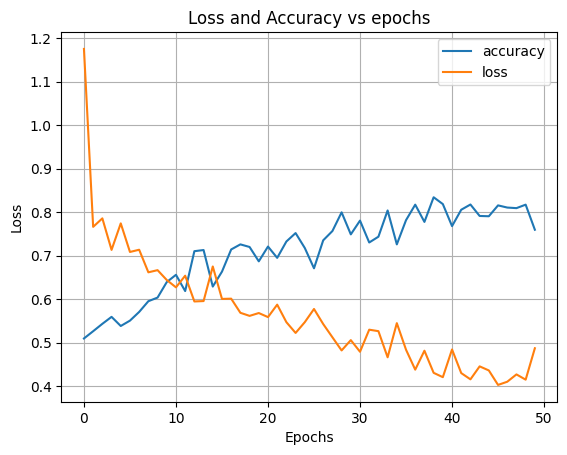

In [294]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('Loss and Accuracy vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


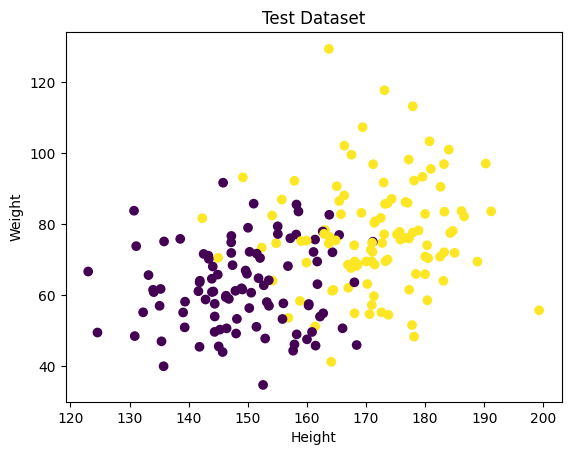

In [296]:
plt.scatter(X_test['Height'],X_test['Weight'],c=Y_test)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Test Dataset')
plt.show()

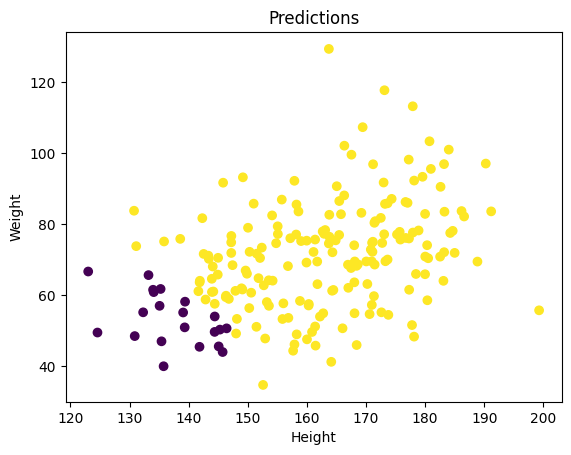

In [297]:
plt.scatter(X_test['Height'],X_test['Weight'],c=Y_predict)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Predictions')
plt.show()

#NORMALIZATION

In [298]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [299]:
X_test_scaled.head()

,Height,Weight
0,0.039891,0.107732
1,0.049603,0.145515
2,0.052090,0.133486
3,0.052430,0.144849
4,0.035255,0.097925


In [300]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

compile = model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.005) ,
                        loss= tf.keras.losses.BinaryCrossentropy,
                        metrics=['accuracy'])

ephoch = 50
history1 = model.fit(X_train_scaled, Y_train, epochs=ephoch)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5761 - loss: 0.6821
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6956 - loss: 0.6163
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6914 - loss: 0.5739
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7353 - loss: 0.5394
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7392 - loss: 0.5374
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.4901
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4529
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8205 - loss: 0.4475
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8242 - loss: 0.4162
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8389 - loss: 0.3986
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8513 - loss: 0.3651
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8425 - loss: 0.3565


Text(0, 0.5, 'Loss')

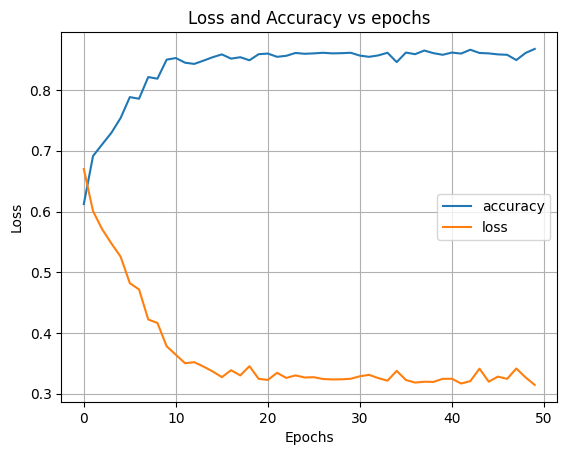

In [302]:
pd.DataFrame(history1.history).plot()
plt.grid(True)
plt.title('Loss and Accuracy vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [303]:
Y_predict_scaled = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [304]:
Y_predict_scaled = np.round(Y_predict_scaled)

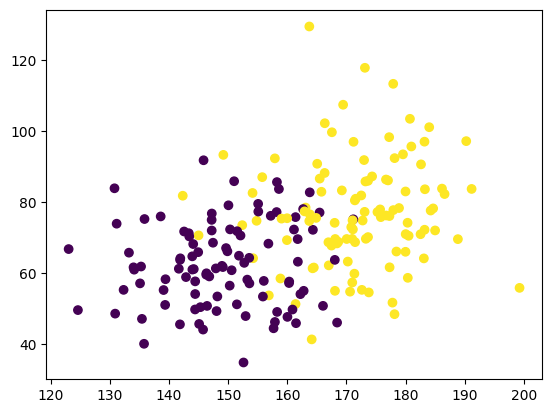

In [305]:
plt.scatter(X_test['Height'],X_test['Weight'],c=Y_test)
plt.show()

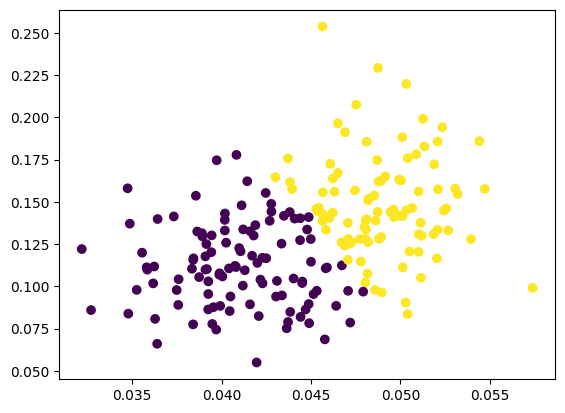

In [306]:
plt.scatter(X_test_scaled['Height'],X_test_scaled['Weight'],c=Y_predict_scaled)
plt.show()